##BANK LOAN ANALYSIS REPORT

###IMPORTING LIBRARIES


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [7]:
df = pd.read_excel("/content/financial_loan.xlsx")

In [8]:
df.head(3)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522


In [9]:
df.shape

(38576, 24)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [11]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


In [12]:
df['emp_title'].ffill(inplace=True)

/tmp/ipython-input-1545489257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_title'].ffill(inplace=True)


In [13]:
df.isnull().sum()

,0
id,0
address_state,0
application_type,0
emp_length,0
emp_title,0
grade,0
home_ownership,0
issue_date,0
last_credit_pull_date,0
last_payment_date,0


##Total Loan Application


In [14]:
total_loan_application = df['id'].count()
print(total_loan_application)

38576


##MTD Total loan application

In [15]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_loan_application = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_application = mtd_loan_application['id'].count()
print(mtd_loan_application)

4314


###Total Funded Amount

In [16]:
total_funded_amaount = df['loan_amount'].sum()
total_funded_amaount_millions = total_funded_amaount / 1000000
print("total_funded_amaount: ${:.2f}M". format(total_funded_amaount_millions))


total_funded_amaount: $435.76M


##MTD  Total Funded Amount

In [17]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000
print("mtd_total_funded_amount: ${:.2f}M". format(mtd_total_funded_amount_millions))

mtd_total_funded_amount: $53.98M


##Total Amount Received

In [18]:
total_amaount_received = df['total_payment'].sum()
total_amaount_received_millions = total_funded_amaount / 1000000
print("total_funded_amaount: ${:.2f}M". format(total_amaount_received_millions))


total_funded_amaount: $435.76M


##MTD Total Amount Received

In [ ]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000
print("mtd_total_amount_received: ${:.2f}M". format(mtd_total_amount_received_millions))

##Average Interest Rate

In [20]:
average_interest_rate = df['int_rate'].mean()*100
print("{:.2f}". format(average_interest_rate))

12.05


##Average Debt to Income Ration

In [19]:
average_dti = df['dti'].mean()*100
print("{:.2f}%". format(average_dti))

13.33%


##Good Loan Metrices

In [23]:
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])]
total_loan_application = df['id'].count()

total_good_loans = good_loans['id'].count()
good_loan_percentage = (total_good_loans / total_loan_application) * 100
print("percentage of good loan: {:.2f}%". format(good_loan_percentage))

print("total good loans:",total_good_loans)
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
print("good_loan_funded_amount: ${:.2f}M". format(good_loan_funded_amount_millions))

good_loan_received = good_loans['total_payment'].sum()
good_loan_received_millions = good_loan_received / 1000000
print("good_loan_received: ${:.2f}M". format(good_loan_received_millions))

percentage of good loan: 86.18%
total good loans: 33243
good_loan_funded_amount: $370.22M
good_loan_received: $435.79M


##Bad loan Metrices

In [26]:
bad_loan = df[df['loan_status'].isin(["Charged Off"])]
total_loan_application = df['id'].count()

total_bad_loans = bad_loan['id'].count()
bad_loan_percentage = (total_bad_loans / total_loan_application) * 100
print("percentage of bad loan: {:.2f}%". format(bad_loan_percentage))

print("total bad loans:",total_bad_loans)

bad_loan_funded_amount = bad_loan['loan_amount'].sum()
bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
print("bad_loan_funded_amount: ${:.2f}M". format(bad_loan_funded_amount_millions))

bad_loan_received = bad_loan['total_payment'].sum()
bad_loan_received_millions = bad_loan_received / 1000000
print("bad_loan_received: ${:.2f}M". format(bad_loan_received_millions))

percentage of bad loan: 13.82%
total bad loans: 5333
bad_loan_funded_amount: $65.53M
bad_loan_received: $37.28M


##Monthly trend by issue date for total funded amount


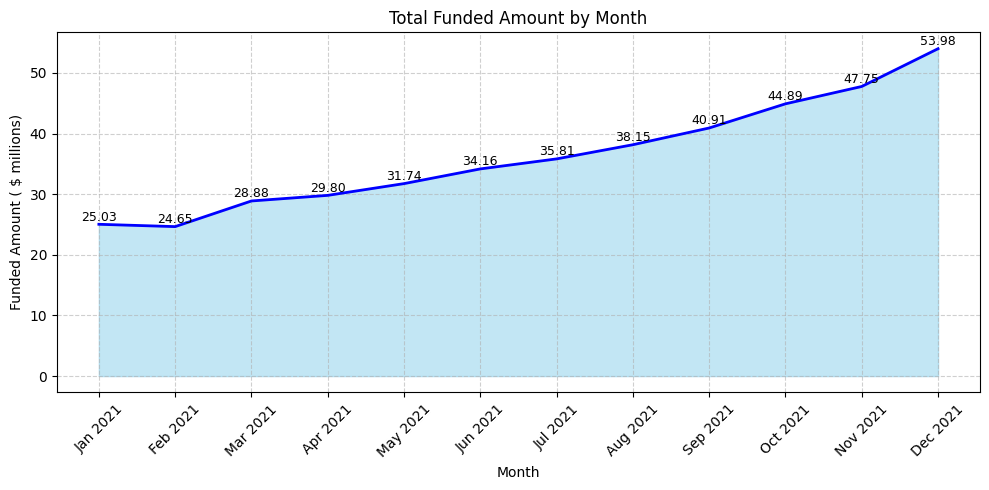

In [31]:
monthly_funded = (
     df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
     .groupby('month_name',sort = False)['loan_amount']
     .sum()
     .div(1_000_000)
     .reset_index(name = 'loan_amount_millions')

)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'], color = 'skyblue',alpha= 0.5)
plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color = 'blue',linewidth = 2)

for i, row in monthly_funded.iterrows():
  plt.text(i, row['loan_amount_millions']+ 0.1, f"{row['loan_amount_millions']:.2f}",
           ha='center',va = 'bottom', fontsize=9, rotation = 0, color = 'black')

plt.title('Total Funded Amount by Month')
plt.xlabel('Month')
plt.ylabel('Funded Amount ( $ millions)')
plt.xticks(ticks = range(len(monthly_funded)), labels= monthly_funded['month_name'],rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

##Monthly Trends by Issue Date for Total Amount Received

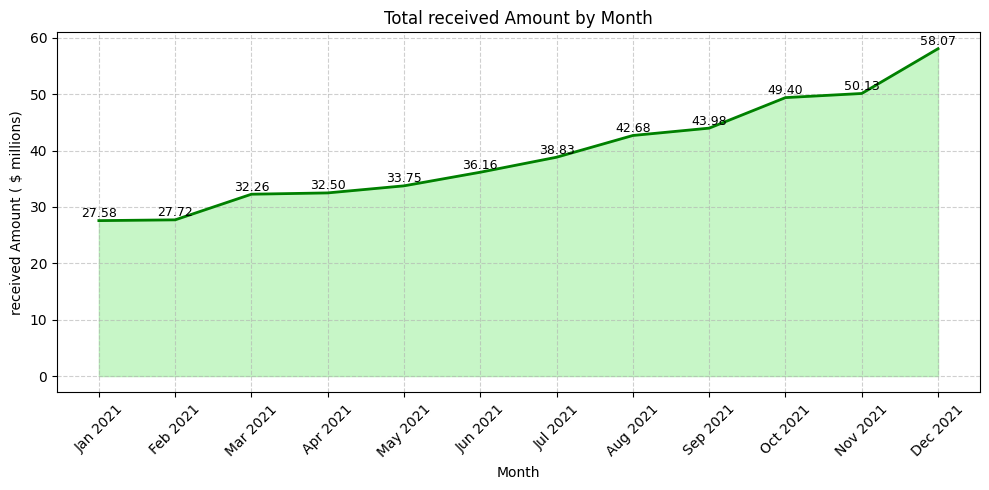

In [32]:
monthly_received = (
     df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
     .groupby('month_name',sort = False)['total_payment']
     .sum()
     .div(1_000_000)
     .reset_index(name = 'received_amount_millions')

)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'], color = 'lightgreen',alpha= 0.5)
plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color = 'green',linewidth = 2)

for i, row in monthly_received.iterrows():
  plt.text(i, row['received_amount_millions']+ 0.1, f"{row['received_amount_millions']:.2f}",
           ha='center',va = 'bottom', fontsize=9, rotation = 0, color = 'black')

plt.title('Total received Amount by Month')
plt.xlabel('Month')
plt.ylabel('received Amount ( $ millions)')
plt.xticks(ticks = range(len(monthly_received)), labels= monthly_received['month_name'],rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

 ## monthly trends by issue date for total loan application

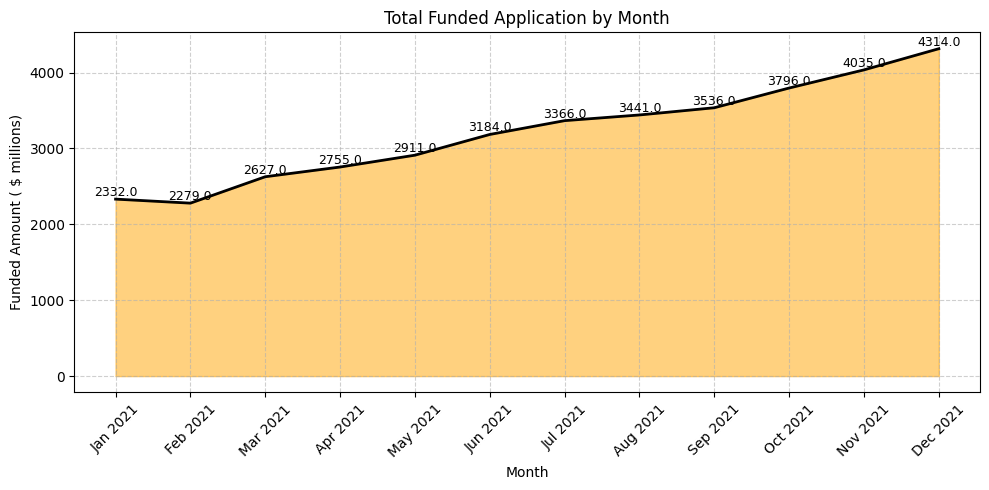

In [38]:
monthly_application = (
     df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
     .groupby('month_name',sort = False)['id']
     .count()
     .reset_index(name = 'loan_applications_count')

)

plt.figure(figsize=(10,5))
plt.fill_between(monthly_application['month_name'],monthly_application['loan_applications_count'], color = 'orange',alpha= 0.5)
plt.plot(monthly_application['month_name'],monthly_application['loan_applications_count'],color = 'black',linewidth = 2)

for i, row in monthly_application.iterrows():
  plt.text(i, row['loan_applications_count']+ 0.1, f"{row['loan_applications_count']:.1f}",
           ha='center',va = 'bottom', fontsize=9, rotation = 0, color = 'black')

plt.title('Total Funded Application by Month')
plt.xlabel('Month')
plt.ylabel('Funded Amount ( $ millions)')
plt.xticks(ticks = range(len(monthly_application)), labels= monthly_application['month_name'],rotation = 45)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## Regional Analysis by State for Total Funded Amount

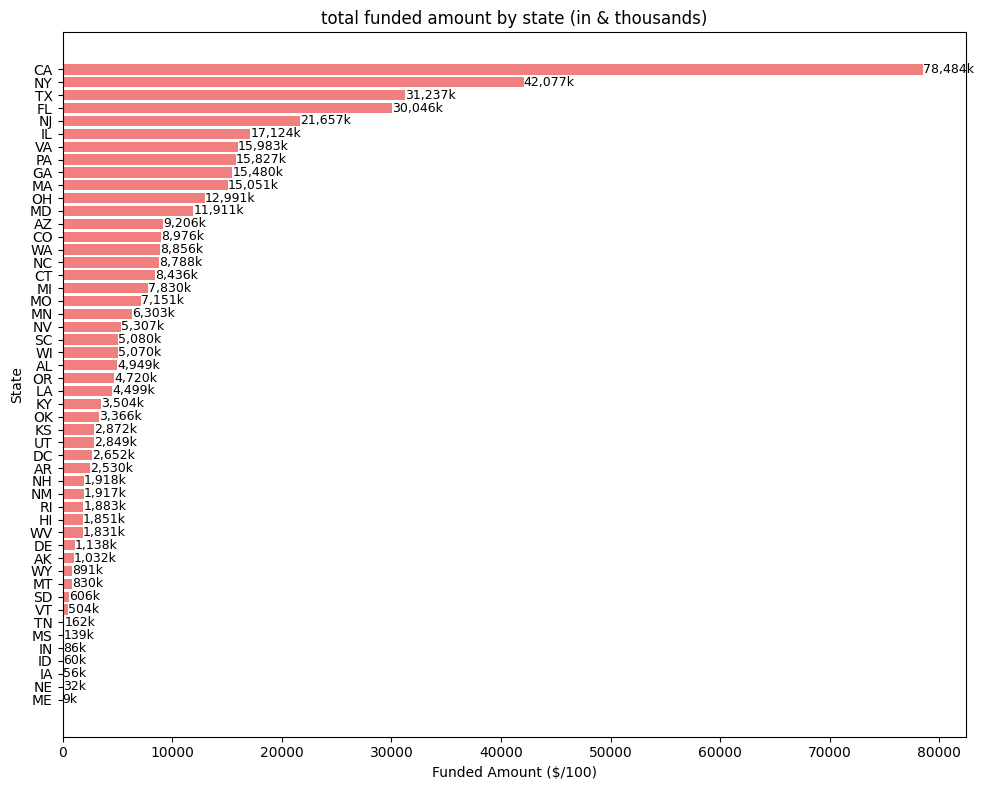

In [42]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending = True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize = (10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color = 'lightcoral')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 10, bar.get_y() + bar.get_height()/2,
           f'{width:,.0f}k', va= 'center', fontsize = 9)

plt.title('total funded amount by state (in & thousands)')
plt.xlabel('Funded Amount ($/100)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

## long term analysis by total funded amoount

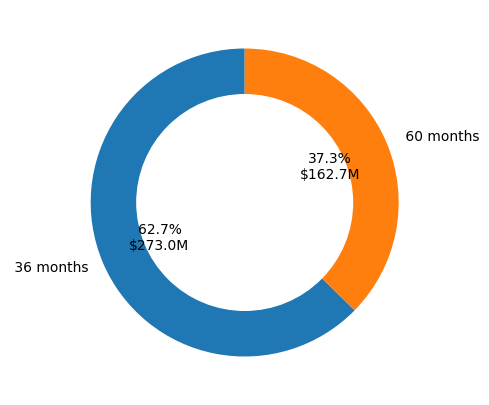

In [44]:
term_funding_millions = df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize= (5,5))
plt.pie(
    term_funding_millions,
    labels = term_funding_millions.index,
    autopct = lambda p: f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle = 90,
    wedgeprops = {'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0),0.70,color = 'white'))
plt.title = ('Total Funded Amount by Term (in $ millions)')
plt.show()

## employee length by total funded amount

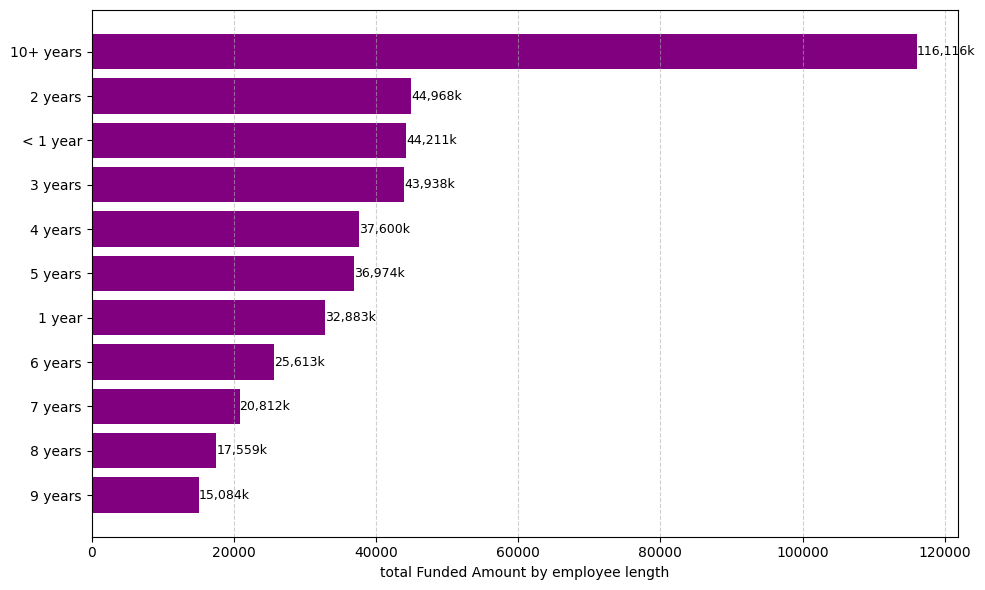

In [49]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize = (10,6))
bars = plt.barh(emp_funding.index, emp_funding, color = 'purple')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 5, bar.get_y() + bar.get_height()/2,
           f'{width:,.0f}k', va= 'center', fontsize = 9)

plt.title = ("funded amount (in & thousands)")
plt.xlabel('total Funded Amount by employee length')
plt.grid(axis = 'x',linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

## loan purpose by total funded amount

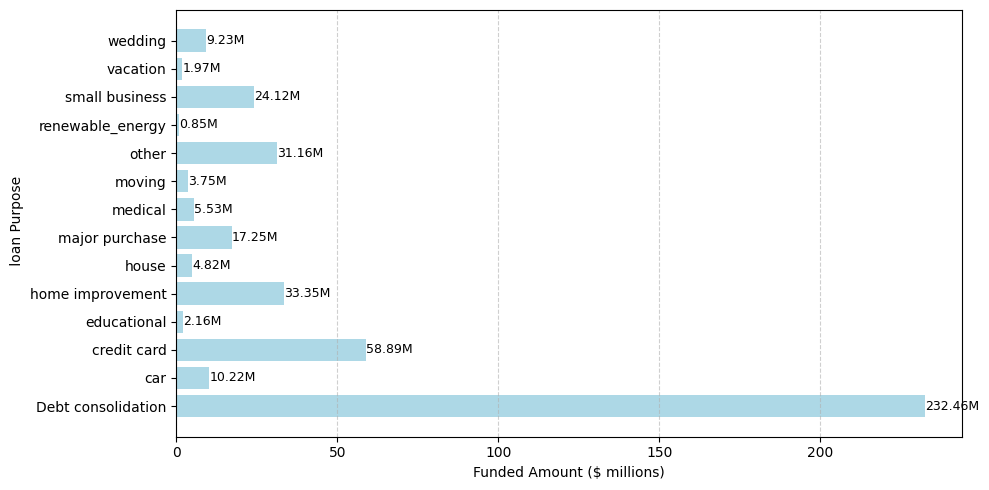

In [51]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum()/1000000

plt.figure(figsize= (10,5))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color = 'lightblue')

for bar in bars:
  width = bar.get_width()
  plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
           f'{width:,.2f}M', va= 'center', fontsize = 9)

plt.title = ('Total Funded Amount by Purpose')
plt.xlabel('Funded Amount ($ millions)')
plt.ylabel(' loan Purpose')
plt.grid(axis = 'x',linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()